**IMPORTING NECESSARY LIBRARIES**

In [11]:
import os,pandas as pd,matplotlib.pyplot as plt,seaborn as sns,re,string,numpy as np,warnings
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from pathlib import Path
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,accuracy_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
warnings.filterwarnings(action='ignore')
Models=r'MLF_MODELS'
if not os.path.exists(Models):
    os.mkdir(Models)

**DATA CLEANING :HANDLING MISSING VALUES,DUPLICATES,OUTLIERS.**

In [12]:
# Loading Dataset
df=pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')
print("Shape : ",df.shape,sep=" ")
# check for empty values
print("\nDataset Info : \n",df.info())

print("\nNull Values :\n",df.isna().sum())
print("\nShape : ",df.shape,sep=" ")
print("\nDuplicated Values :",df.duplicated().value_counts().iloc[1] ,sep=" ")
df.head()


Shape :  (5572, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB

Dataset Info : 
 None

Null Values :
 v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Shape :  (5572, 5)

Duplicated Values : 403


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**DATA PREPROCESSING : COLUMNS NAME CHANGING AND ENCODE FEATURES.**

In [13]:
# Dropping duplicated values and null columns
df.drop_duplicates(inplace=True)
print("New Shape : ",df.shape ,sep= "")

Null_colums=[columns for columns in df.columns if columns.startswith("Un")]
df.drop(columns=Null_colums,inplace=True)
# change column names
df.columns=['Label','Text']
le=LabelEncoder()
df['Label_Encoded']=le.fit_transform(df['Label'])

df.head()


New Shape : (5169, 5)


,Label,Text,Label_Encoded
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


**A GRAPH BETWEEN HAM AND SPAM COUNT IN THE DATASET**

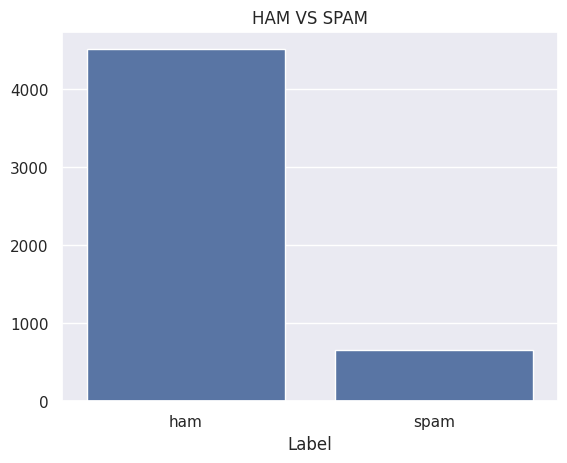

In [14]:
sns.set_theme(style='darkgrid')
sns.barplot(x=df['Label'].value_counts().index,y=df['Label'].value_counts().values)
plt.title("HAM VS SPAM")

plt.show()

**THE WORD CLOUD VISUALIZATION TO HELP IDENTIFY THE MOST COMMOM WORDS IN THE DATASET**
* **PROVIDING INSIGHT INTO THE TEXT DATA**

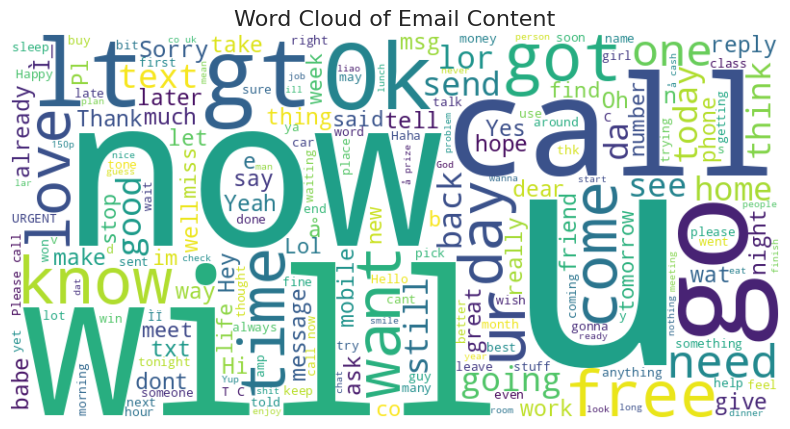

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
text_data = ' '.join(df['Text'])

# Generate the word cloud
word_cloud = WordCloud(background_color='white', width=800, height=400).generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Email Content', fontsize=16)
plt.show()


#### DEFINE A FUNCTION PERFORM A NLP ON THE DATA**
* **REMOVE SPECIAL KEYS**
* **CONVERT TO LOWER CASE**
* **SPLIT TEXT USING REGULAR EXPRESSION (RE)**
* **WORDNETLEMMATIZER TO RE**

* **ADD ADDITIONAL COLUMNS**

* **CALCULATE PERCENTAGE OF SPECIAL LETTER IN THE TEXT**
* **LENGHT OF THE TEXT EXCLUDING WHITESPACE**


In [16]:
# Create function to  tokenization, removal of stopwords, stemming
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
Word=WordNetLemmatizer()
stop=stopwords.words('english')
def clean_text(text:str):
    text="".join([punt for punt in text if punt not in string.punctuation]).lower()
    Splitter=re.split(r"\W+",text)
    word=" ".join([Word.lemmatize(stemming) for stemming in Splitter if stemming not in stop ])
    return word

def Percentage(text:str):
    perc=sum([1 for punt in text if punt in string.punctuation])
    return round(perc/(len(text)-text.count(' ')),2)*100

lengh=lambda x:len(x)-x.count(' ')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**APPLY THE FUNCTIONS**

In [17]:
# creating new columns using the functions created above
df['Lenght_']=df['Text'].apply(lambda x: lengh(x))
df['Percentage_']=df['Text'].apply(lambda x:Percentage(x))
df['clean_text']=df['Text'].apply(lambda x: clean_text(x))

print(df.isna().sum())
df.head()

Label            0
Text             0
Label_Encoded    0
Lenght_          0
Percentage_      0
clean_text       0
dtype: int64


,Label,Text,Label_Encoded,Lenght_,Percentage_,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,92,10.0,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,24,25.0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,128,5.0,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,39,15.0,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,49,4.0,nah dont think go usf life around though


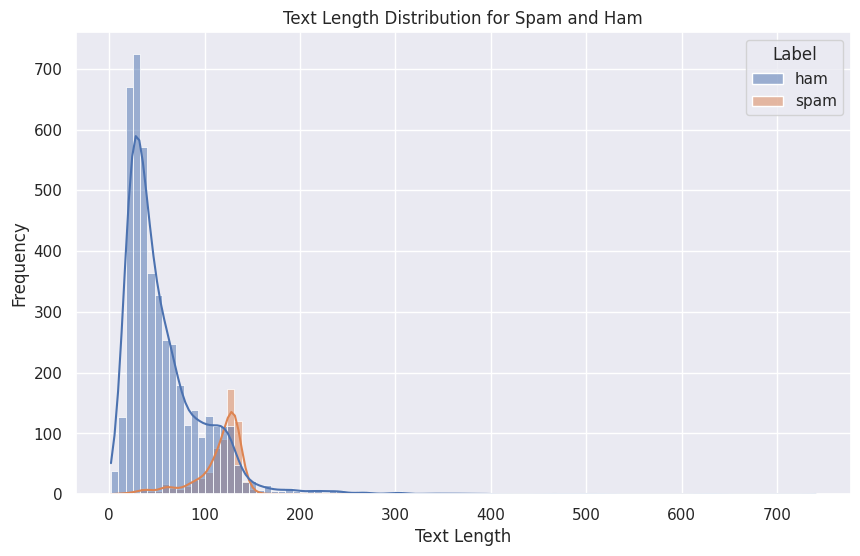

In [18]:
# @title Text Length Distribution for Spam and Ham

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Lenght_', hue='Label', kde=True)
plt.title('Text Length Distribution for Spam and Ham')
plt.xlabel('Text Length')
_ = plt.ylabel('Frequency')

**USE TFID TO VECTORIZE THE TEXT INTO MATRIX**
* **JOIN THE PERCENTAGE AND THE LENGHT COLUMN WITH THE NEW MATRIX TO CREATE A NEW DATAFRAME TO TRAIN THE MODEL**

In [19]:
# Split Data into Train and text
X=df['clean_text']
y=df['Label_Encoded']
#Vectorize text with TfidVectorizer and create a new dataframe
TFID=TfidfVectorizer()
X_train1=TFID.fit_transform(X).toarray()
new_sample=pd.DataFrame(np.hstack([df[['Lenght_','Percentage_']],X_train1]))
print(df['Label_Encoded'].shape)
rows,columns=new_sample.shape
print("Shape of the new dataset : \n","\tRows : ",rows,"\n",'\tColumns : ',columns)

new_sample.head()

(5169,)
Shape of the new dataset : 
 	Rows :  5169 
 	Columns :  8833


,0,1,2,3,4,5,6,7,8,9,...,8823,8824,8825,8826,8827,8828,8829,8830,8831,8832
0,92.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X_train,X_test,y_train,y_test=train_test_split(new_sample,y,random_state=42,test_size=0.2)

**COMPARING THE MODEL EVALUATION TO GET THE BEST MODEL**
* **CREATE A PIPELINE TO NORMALIZE THE DATA BEFORE TRAINING THE MODEL**
* **PLOT THE MODEL AND THIER ACCURACY SCORE**

Model Name :DecisionTree
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       889
           1       0.83      0.85      0.84       145

    accuracy                           0.95      1034
   macro avg       0.90      0.91      0.90      1034
weighted avg       0.95      0.95      0.95      1034

Model Name :RandomForestClassifier
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       1.00      0.80      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034

Model Name :SVC
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       889
           1       1.00      0.43      0.61       145

    accuracy                           0.92      1034
   macro avg       0.96      0.72      0.78      

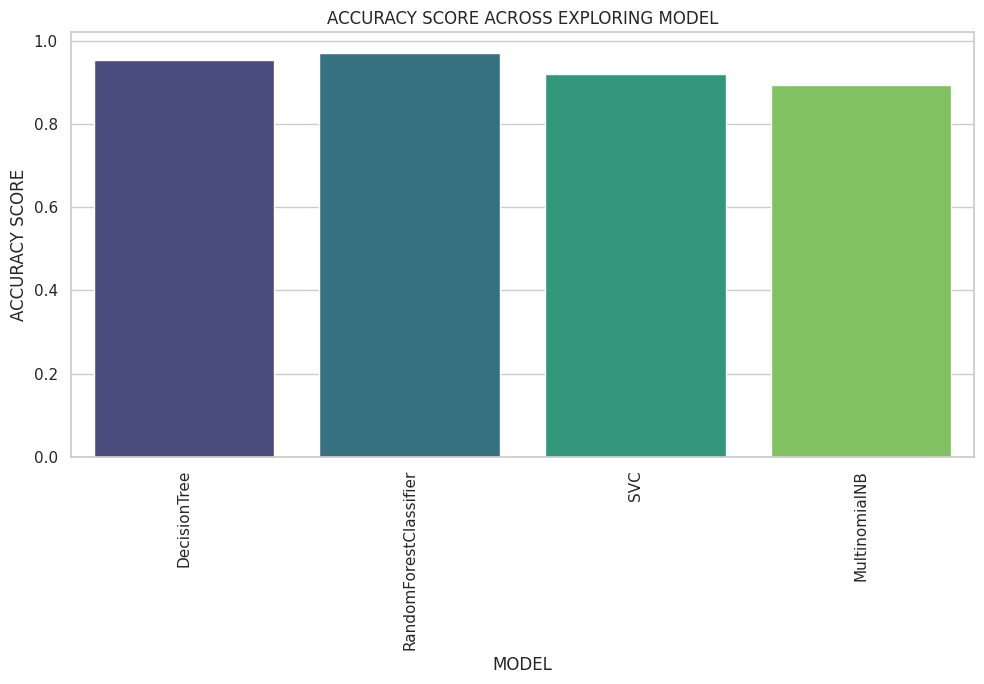

In [21]:

rf_map={}
Models ={"DecisionTree":DecisionTreeClassifier(),
         "RandomForestClassifier":RandomForestClassifier(),
         "SVC":SVC(),
         "MultinomialNB":MultinomialNB()
         }

for Name,Model in Models.items():
    if Name !="MultinomialNB":

        maker=make_pipeline(StandardScaler(),Model)
        maker.fit(X_train,y_train)
    else:
        maker=Model.fit(X_train,y_train)

    y_pred=maker.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    rf_map[Name]=accuracy
    print(f"Model Name :{Name}\n",classification_report(y_test,y_pred))



x=rf_map.keys()
y=rf_map.values()
sns.set_style(style='whitegrid')
plt.figure(figsize=(10,7))
plt.title('ACCURACY SCORE ACROSS EXPLORING MODEL')
sns.barplot(x=x,y=y,palette='viridis',legend='brief')
plt.ylabel('ACCURACY SCORE')
plt.xlabel('MODEL')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**HYPERTUNING THE BEST MODEL**
* **Normalize the Data using StandardScaler**
* **RandomForestClassifier**

In [25]:
X_train_=StandardScaler()
X_train=X_train_.fit_transform(X_train)
X_test=X_train_.transform(X_test)
Rf=RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200, 500,None],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


GRID=GridSearchCV(estimator=Rf,param_grid=param_grid,n_jobs=-1)
GRID.fit(X_train,y_train)


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 500, None]})

In [47]:
print("Best Score : ",GRID.best_score_)
print("Best Params : ",GRID.best_params_)

Best Score :  0.9721886336154775
Best Params :  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [48]:
Hyper_=GRID.best_estimator_
y_pred_=Hyper_.predict(X_train_.transform(X_test))
print("Accuracy : ",round(accuracy_score(y_test,y_pred_),3))
print(classification_report(y_test,y_pred_))

Accuracy :  0.9721886336154775
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.72      0.84       145

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034



**CROSS VALIDATION ON MODEL**

In [27]:
cross_val_score(Hyper_,X_train,y_train).mean()

0.970253929866989

**SAVING MODEL FOR DEPLOYMENT**

In [41]:
import joblib
joblib.dump(X_train_,r'MLF_MODELS/StandardScaler.pkl')
joblib.dump(TFID,r'MLF_MODELS/TFID.pkl')
joblib.dump(Hyper_,r'MLF_MODELS/Model.pkl')

['MLF_MODELS/Model.pkl']

In [1]:
import sklearn
sklearn.__version__


'1.5.2'

In [2]:
import joblib
StandardScaler_=joblib.load(r'MLF_MODELS/StandardScaler.pkl')
print(f"Sucessfully Loaded StandardScaler {StandardScaler_}")
TFID_=joblib.load(r'MLF_MODELS/TFID.pkl')
print(f"Sucessfully Loaded TFID {TFID_}")
Hyper__=joblib.load(r'MLF_MODELS/Model.pkl')
print(f"Sucessfully Loaded HyperTuned Model {Hyper__}")

Sucessfully Loaded StandardScaler StandardScaler()
Sucessfully Loaded TFID TfidfVectorizer()
Sucessfully Loaded HyperTuned Model RandomForestClassifier(min_samples_split=10)


In [ ]:
import re,string,pandas as pd,numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def Cleaning(Text:str):

    check= True if isinstance(Text,str) else False
    if check:
        Word=WordNetLemmatizer()
        stop=stopwords.words('english')
        text="".join([punt for punt in Text if punt not in string.punctuation]).lower()
        Splitter=re.split(r"\W+",text)
        word=" ".join([Word.lemmatize(stemming) for stemming in Splitter if stemming not in stop ])
        New_=pd.DataFrame({"clean_":[word]})
        perc=sum([1 for punt in Text if punt in string.punctuation])
        New_['Percentage_']=round(perc/(len(text)-text.count(' ')),2)*100
        New_['Lenght_']=len(Text)-Text.count(' ')
        transform=TFID_.transform(New_['clean_']).toarray()
        new_=pd.DataFrame(np.hstack([New_[['Lenght_','Percentage_']],transform]))
        tranform=StandardScaler_.transform(new_)
        mapp={1:"SPAM",0:"HAM"}

        print(mapp[Hyper__.predict(tranform)[0]])



Cleaning("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's	")

SPAM
